In [18]:
pip install yfinance


In [19]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data = yf.download('AAPL',start='2022-01-01',end='2022-12-31')
display(data.head())

/tmp/ipython-input-49-2102775386.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL',start='2022-01-01',end='2022-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645645,179.499574,174.425140,174.542917,104487900
2022-01-04,176.378357,179.558473,175.809076,179.254206,99310400
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600
2022-01-06,168.820679,172.059683,168.467333,169.507737,96904000
2022-01-07,168.987534,170.921120,167.868606,169.694226,86709100


In [50]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645645,179.499574,174.425140,174.542917,104487900
2022-01-04,176.378357,179.558473,175.809076,179.254206,99310400
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600
2022-01-06,168.820679,172.059683,168.467333,169.507737,96904000
2022-01-07,168.987534,170.921120,167.868606,169.694226,86709100


In [51]:
display(data.head())
data=data.dropna()
display(data.head())
X= data[[('High','AAPL'),('Low','AAPL'),('Open','AAPL'),('Volume','AAPL')]]
y= data[('Close','AAPL')]

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645645,179.499574,174.425140,174.542917,104487900
2022-01-04,176.378357,179.558473,175.809076,179.254206,99310400
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600
2022-01-06,168.820679,172.059683,168.467333,169.507737,96904000
2022-01-07,168.987534,170.921120,167.868606,169.694226,86709100


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645645,179.499574,174.425140,174.542917,104487900
2022-01-04,176.378357,179.558473,175.809076,179.254206,99310400
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600
2022-01-06,168.820679,172.059683,168.467333,169.507737,96904000
2022-01-07,168.987534,170.921120,167.868606,169.694226,86709100


In [52]:
y

,Close
,AAPL
Date,
2022-01-03,178.645645
2022-01-04,176.378357
2022-01-05,171.686707
2022-01-06,168.820679
2022-01-07,168.987534
...,...
2022-12-23,130.173767
2022-12-27,128.367172


In [58]:
import sklearn.model_selection as model_selection
train_x,test_x,train_y,test_y=model_selection.train_test_split(X,y,test_size=0.2)

In [60]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [61]:
ypred= model.predict(test_x)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, ypred)
r2 = r2_score(test_y, ypred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 87.4528
R² Score: 0.3907


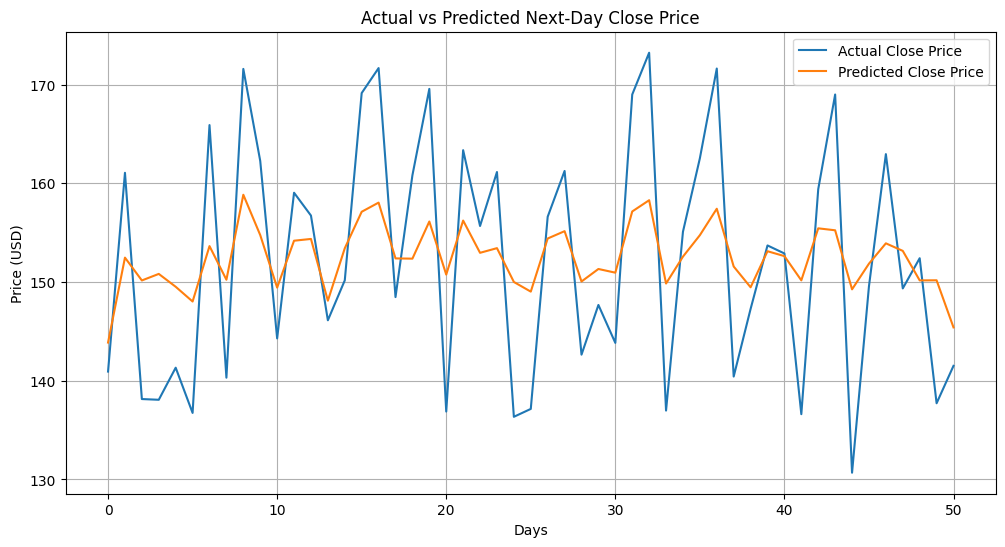

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(test_y.values, label='Actual Close Price')
plt.plot(ypred, label='Predicted Close Price')
plt.title('Actual vs Predicted Next-Day Close Price')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()